In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/College%20Football%20Games%20(2000%20to%202018)/CFBeattendance.csv', encoding='latin-1')

In [3]:
data

,Date,Team,Time,Opponent,Rank,Site,TV,Result,Attendance,Current Wins,...,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day
0,9/2/2000,Arkansas,8:00 PM,Southwest Missouri State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 380,53946,0,...,0.00,0.0,0.0,105,65,NR,SEC,2000,9,2
1,9/16/2000,Arkansas,6:00 PM,Boise State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 3831,54286,1,...,0.00,0.0,0.0,79,44,NR,SEC,2000,9,16
2,9/23/2000,Arkansas,8:00 PM,Alabama,NR,"Razorback StadiumFayetteville, AR",ESPN2,W 2821,51482,2,...,2.12,0.0,0.0,85,63,NR,SEC,2000,9,23
3,9/30/2000,Arkansas,11:30 AM,No. 25 Georgia,NR,"Razorback StadiumFayetteville, AR",JPS,L 738,51162,3,...,0.00,0.0,0.0,77,45,25,SEC,2000,9,30
4,10/7/2000,Arkansas,6:00 PM,LouisianaMonroe*,NR,"Razorback StadiumFayetteville, AR",Not on TV,W 526,50947,3,...,0.00,0.0,0.0,50,28,NR,SEC,2000,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,9/22/2018,UTEP,5:30 PM,New Mexico State*,NR,"Sun BowlEl Paso, TX (Battle of I-10)",ESPN3,L 2027,19412,0,...,0.00,0.0,0.0,80,61,NR,CUSA,2018,9,22
6668,10/6/2018,UTEP,5:30 PM,North Texas,NR,"Sun BowlEl Paso, TX",beIN,L 2427,12809,0,...,0.00,0.0,0.0,88,67,NR,CUSA,2018,10,6
6669,10/27/2018,UTEP,5:30 PM,UAB,NR,"Sun BowlEl Paso, TX",ESPN+,L 019,10787,0,...,0.00,0.0,0.0,77,49,NR,CUSA,2018,10,27
6670,11/10/2018,UTEP,1:00 PM,Middle Tennessee,NR,"Sun BowlEl Paso, TX",ESPN+,L 3248,9690,1,...,0.00,0.0,0.0,63,44,NR,CUSA,2018,11,10


In [4]:
features_to_drop = ['Date', 'Site', 'Team', 'Opponent']

data.drop(features_to_drop, axis=1, inplace=True)

In [5]:
data.isna().sum()

Time                0
Rank                0
TV                  0
Result              0
Attendance          0
Current Wins        0
Current Losses      0
Stadium Capacity    0
Fill Rate           0
New Coach           0
Tailgating          0
PRCP                0
SNOW                0
SNWD                0
TMAX                0
TMIN                0
Opponent_Rank       0
Conference          0
Year                0
Month               0
Day                 0
dtype: int64

In [6]:
data.dtypes

Time                 object
Rank                 object
TV                   object
Result               object
Attendance            int64
Current Wins          int64
Current Losses        int64
Stadium Capacity      int64
Fill Rate           float64
New Coach              bool
Tailgating             bool
PRCP                float64
SNOW                float64
SNWD                float64
TMAX                  int64
TMIN                  int64
Opponent_Rank        object
Conference           object
Year                  int64
Month                 int64
Day                   int64
dtype: object

In [7]:
categorical_features = ['Time', 'Rank', 'TV', 'Opponent_Rank', 'Conference']
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}
get_uniques(data, categorical_features)

{'Time': ['8:00 PM',
  '6:00 PM',
  '11:30 AM',
  '2:00 PM',
  '1:30 PM',
  '6:30 PM',
  '2:30 PM',
  '1:00 PM',
  '6:45 PM',
  '7:45 PM',
  '5:00 PM',
  '7:00 PM',
  '11:00 AM',
  '11:21 AM',
  '6:15 PM',
  '3:00 PM',
  '12:00 PM',
  '9:00 PM',
  '4:30 PM',
  '7:30 PM',
  '3:05 PM',
  '4:00 PM',
  '5:30 PM',
  '6:05 PM',
  '1:05 PM',
  '8:15 PM',
  '12:30 PM',
  '8:30 PM',
  '1:45 PM',
  '3:45 PM',
  '7:15 PM',
  '10:00 AM',
  '3:30 PM',
  '5:45 PM',
  '12:20 PM',
  '11:10 AM',
  '7:20 PM',
  '1:10 PM',
  '6:10 PM',
  '11:40 AM',
  '2:35 PM',
  '2:45 PM',
  '10:30 AM',
  '3:40 PM',
  '12:10 PM',
  '12:05 PM',
  '7:05 PM',
  '4:45 PM',
  '4:05 PM',
  '8:05 PM',
  '2:05 PM',
  '6:35 PM',
  '6:50 PM',
  '3:15 PM',
  '12:15 PM',
  '1:15 PM',
  '5:10 PM',
  '4:20 PM',
  '8:04 PM',
  '11:05 AM',
  '5:05 PM',
  '4:15 PM',
  '5:15 PM',
  '7:35 PM',
  '3:36 PM',
  '7:06 PM',
  '12:35 PM',
  '12:45 PM',
  '2:15 PM'],
 'Rank': ['NR',
  '14',
  '7',
  '11',
  '17',
  '15',
  '13',
  '5',
  '20',


In [8]:
binary_features = ['TV', 'New Coach', 'Tailgating']

ordinal_features = ['Time', 'Rank', 'Opponent_Rank']

nominal_features = ['Conference']

In [9]:
data["TV"].value_counts()

Not on TV                              1317
ESPN                                    508
ESPN2                                   460
ABC                                     453
FSN                                     403
                                       ... 
FSSW PPV                                  1
ESPN3, WAC Sports Network                 1
KJZZ, Oceanic PPV, KFVE (delayed)         1
ESPN2 Oceanic PPV, KFVE (Simulcast)       1
Versus/CSTV/mtn                           1
Name: TV, Length: 245, dtype: int64

In [10]:
data['TV'] = data['TV'].apply(lambda x: 0 if x == 'Not on TV' else 1)
data['New Coach'] = data['New Coach'].astype(np.int)
data['Tailgating'] = data['Tailgating'].astype(np.int)
data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

,Time,Rank,TV,Result,Attendance,Current Wins,Current Losses,Stadium Capacity,Fill Rate,New Coach,...,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day
0,8:00 PM,NR,0,W 380,53946,0,0,53727,1.004076,0,...,0.00,0.0,0.0,105,65,NR,SEC,2000,9,2
1,6:00 PM,NR,0,W 3831,54286,1,0,53727,1.010404,0,...,0.00,0.0,0.0,79,44,NR,SEC,2000,9,16
2,8:00 PM,NR,1,W 2821,51482,2,0,50019,1.029249,0,...,2.12,0.0,0.0,85,63,NR,SEC,2000,9,23
3,11:30 AM,NR,1,L 738,51162,3,0,50019,1.022851,0,...,0.00,0.0,0.0,77,45,25,SEC,2000,9,30
4,6:00 PM,NR,0,W 526,50947,3,1,50019,1.018553,0,...,0.00,0.0,0.0,50,28,NR,SEC,2000,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,5:30 PM,NR,1,L 2027,19412,0,3,51500,0.376932,0,...,0.00,0.0,0.0,80,61,NR,CUSA,2018,9,22
6668,5:30 PM,NR,1,L 2427,12809,0,5,51500,0.248718,0,...,0.00,0.0,0.0,88,67,NR,CUSA,2018,10,6
6669,5:30 PM,NR,1,L 019,10787,0,7,51500,0.209456,0,...,0.00,0.0,0.0,77,49,NR,CUSA,2018,10,27
6670,1:00 PM,NR,1,L 3248,9690,1,8,51500,0.188155,0,...,0.00,0.0,0.0,63,44,NR,CUSA,2018,11,10


In [11]:
data["Rank"].unique()

array(['NR', '14', '7', '11', '17', '15', '13', '5', '20', '10', '21',
       '19', '12', '8', '6', '18', '24', '16', '22', '25', '23', '9', '4',
       '2', '3', '1'], dtype=object)

In [12]:
data['Rank'] = data['Rank'].apply(lambda x: 26 if x == 'NR' else np.int(x))
data['Opponent_Rank'] = data['Opponent_Rank'].apply(lambda x: 26 if x == 'NR' else np.int(x))
time_ordering = sorted(data['Time'].unique())
data['Time'] = data['Time'].apply(lambda x: time_ordering.index(x))
data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

,Time,Rank,TV,Result,Attendance,Current Wins,Current Losses,Stadium Capacity,Fill Rate,New Coach,...,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day
0,63,26,0,W 380,53946,0,0,53727,1.004076,0,...,0.00,0.0,0.0,105,65,26,SEC,2000,9,2
1,47,26,0,W 3831,54286,1,0,53727,1.010404,0,...,0.00,0.0,0.0,79,44,26,SEC,2000,9,16
2,63,26,1,W 2821,51482,2,0,50019,1.029249,0,...,2.12,0.0,0.0,85,63,26,SEC,2000,9,23
3,6,26,1,L 738,51162,3,0,50019,1.022851,0,...,0.00,0.0,0.0,77,45,25,SEC,2000,9,30
4,47,26,0,W 526,50947,3,1,50019,1.018553,0,...,0.00,0.0,0.0,50,28,26,SEC,2000,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,45,26,1,L 2027,19412,0,3,51500,0.376932,0,...,0.00,0.0,0.0,80,61,26,CUSA,2018,9,22
6668,45,26,1,L 2427,12809,0,5,51500,0.248718,0,...,0.00,0.0,0.0,88,67,26,CUSA,2018,10,6
6669,45,26,1,L 019,10787,0,7,51500,0.209456,0,...,0.00,0.0,0.0,77,49,26,CUSA,2018,10,27
6670,16,26,1,L 3248,9690,1,8,51500,0.188155,0,...,0.00,0.0,0.0,63,44,26,CUSA,2018,11,10


In [13]:
data["Conference"].unique()

array(['SEC', 'Big-12', 'WAC', 'MWC', 'Independent', 'ACC', 'Pac-12',
       'Big-10', 'Mid-American', 'CUSA', 'AAC', 'Big East', 'Sun Belt',
       'FCS'], dtype=object)

In [14]:
def onehot_encode(df, column):
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df
data = onehot_encode(data, 'Conference')

In [15]:
data.drop([4355, 5442, 5449, 5456], axis=0, inplace=True)
y = data['Result']
X = data.drop('Result', axis=1)
y

0        W 380
1       W 3831
2       W 2821
3        L 738
4        W 526
         ...   
6667    L 2027
6668    L 2427
6669     L 019
6670    L 3248
6671     L 739
Name: Result, Length: 6668, dtype: object

In [16]:
y = y.apply(lambda x :re.search(r'^[^\s]*', x).group(0))
y.unique()

array(['W', 'L'], dtype=object)

In [17]:
y[(y == 'NC') | (y == 'White') | (y == 'Blue')]

Series([], Name: Result, dtype: object)

In [18]:
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)
y_mappings = {index: value for index, value in enumerate(label_encoder.classes_)}
y_mappings

{0: 'L', 1: 'W'}

In [19]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [20]:
X

,Time,Rank,TV,Attendance,Current Wins,Current Losses,Stadium Capacity,Fill Rate,New Coach,Tailgating,...,Big-12,CUSA,FCS,Independent,MWC,Mid-American,Pac-12,SEC,Sun Belt,WAC
0,63,26,0,53946,0,0,53727,1.004076,0,0,...,0,0,0,0,0,0,0,1,0,0
1,47,26,0,54286,1,0,53727,1.010404,0,0,...,0,0,0,0,0,0,0,1,0,0
2,63,26,1,51482,2,0,50019,1.029249,0,0,...,0,0,0,0,0,0,0,1,0,0
3,6,26,1,51162,3,0,50019,1.022851,0,0,...,0,0,0,0,0,0,0,1,0,0
4,47,26,0,50947,3,1,50019,1.018553,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,45,26,1,19412,0,3,51500,0.376932,0,0,...,0,1,0,0,0,0,0,0,0,0
6668,45,26,1,12809,0,5,51500,0.248718,0,0,...,0,1,0,0,0,0,0,0,0,0
6669,45,26,1,10787,0,7,51500,0.209456,0,0,...,0,1,0,0,0,0,0,0,0,0
6670,16,26,1,9690,1,8,51500,0.188155,0,0,...,0,1,0,0,0,0,0,0,0,0


In [21]:
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Time,Rank,TV,Attendance,Current Wins,Current Losses,Stadium Capacity,Fill Rate,New Coach,Tailgating,...,Big-12,CUSA,FCS,Independent,MWC,Mid-American,Pac-12,SEC,Sun Belt,WAC
0,0.926471,1.0,0.0,0.475769,0.000000,0.000000,0.406803,0.700775,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.691176,1.0,0.0,0.478899,0.083333,0.000000,0.406803,0.705510,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.926471,1.0,1.0,0.453085,0.166667,0.000000,0.365732,0.719610,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.088235,1.0,1.0,0.450139,0.250000,0.000000,0.365732,0.714823,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.691176,1.0,0.0,0.448160,0.250000,0.090909,0.365732,0.711607,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,0.661765,1.0,1.0,0.157841,0.000000,0.272727,0.382136,0.231535,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6664,0.661765,1.0,1.0,0.097052,0.000000,0.454545,0.382136,0.135604,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6665,0.661765,1.0,1.0,0.078437,0.000000,0.636364,0.382136,0.106227,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666,0.235294,1.0,1.0,0.068338,0.083333,0.727273,0.382136,0.090289,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
inputs = tf.keras.Input(shape=(33,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = [
    tf.keras.metrics.BinaryAccuracy(name='acc'),
    tf.keras.metrics.AUC(name='auc')
]

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=metrics
)


batch_size = 32
epochs = 10

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

2022-09-23 22:29:03.499842: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-09-23 22:29:03.692998: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


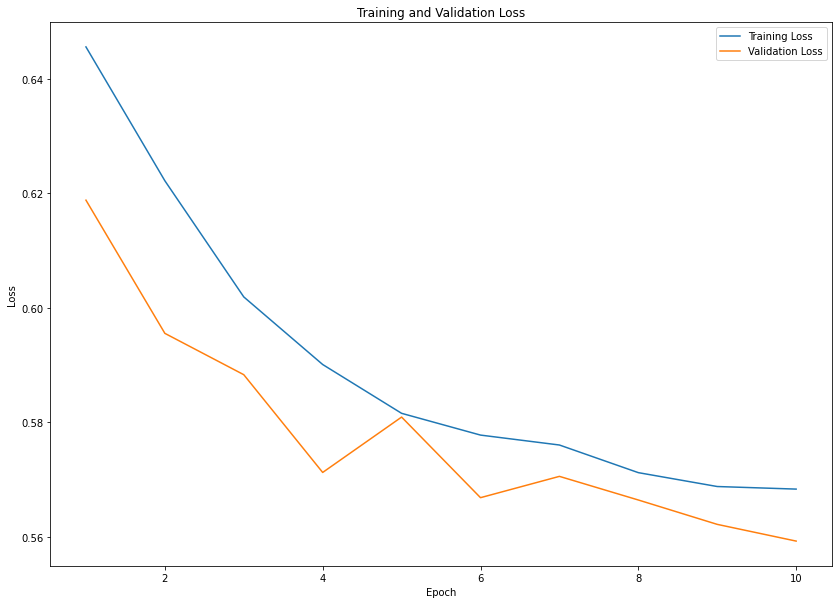

In [23]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [24]:
np.argmin(val_loss)

9

In [25]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.5780 - acc: 0.6922 - auc: 0.7370


[0.5779852867126465, 0.6921539306640625, 0.7369892001152039]

In [26]:
y.sum() / len(y)

0.6415716856628674